# Data Science Sample

## Importing Data

For this example, we are going to import data from our local machine. I will be using a dataset from Kaggle.com’s user Sai Pranav. The dataset is titled “Top Ranked English Movies of this Decade” and it was in a CSV file. 

https://www.kaggle.com/saipranava/top-ranked-enlglish-movies-of-this-decade/data

In [1]:
import pandas as pd 
df = pd.read_csv('IMDB.csv', index_col=0, encoding='latin-1')

## Data Exploration and Data Cleaning

Now that we have our data imported into Pandas, we can check out the first few rows of our dataframe. 

In [2]:
df.head()

Title  Rating TotalVotes     Genre1     Genre2   Genre3  \
1  12 Years a Slave (2013)     8.1    496,092  Biography      Drama  History   
2         127 Hours (2010)     7.6    297,075  Adventure  Biography    Drama   
3             50/50 (2011)     7.7    283,935     Comedy      Drama  Romance   
4        About Time (2013)     7.8    225,412     Comedy      Drama  Fantasy   
5             Amour (2012)     7.9     76,121      Drama    Romance      NaN   

   MetaCritic        Budget  Runtime  ï..CVotes10  ...  Votes3044  Votes3044M  \
1        96.0  $20,000,000   134 min        75556  ...        8.0         7.9   
2        82.0  $18,000,000    94 min        28939  ...        7.5         7.5   
3        72.0   $8,000,000   100 min        28304  ...        7.6         7.6   
4         NaN  $12,000,000   123 min        38556  ...        7.6         7.6   
5        94.0   $8,900,000   127 min        11093  ...        7.7         7.7   

   Votes3044F  Votes45A  Votes45AM  Votes45AF  VotesIMDB  Votes1000  VotesUS  \
1         8.0       7.8        7.8        8.1        8.0        7.7      8.3   
2         7.5       7.3        7.3        7.5        7.6        7.0      7.7   
3         7.6       7.4        7.4        7.5        7.4        7.0      7.9   
4         7.7       7.6        7.5        7.8        7.7        6.9      7.8   
5         7.9       7.9        7.8        8.1        6.6        7.2      7.9   

  VotesnUS  
1      8.0  
2      7.6  
3      7.6  
4      7.7  
5      7.8  

[5 rows x 54 columns]

Our target is going to be the column titled Rating and our features are going to be the columns titled the following: MetaCritic, Budget, Runtime, VotesUS, VotesnUS, and TotalVotes. I will remove all of the columns we don’t need for this analysis. 

In [3]:
df = df[['Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget', 'Runtime', 'VotesUS', 'VotesnUS']]
df.head(10)

Title  Rating TotalVotes  MetaCritic  \
1      12 Years a Slave (2013)     8.1    496,092        96.0   
2             127 Hours (2010)     7.6    297,075        82.0   
3                 50/50 (2011)     7.7    283,935        72.0   
4            About Time (2013)     7.8    225,412         NaN   
5                 Amour (2012)     7.9     76,121        94.0   
6                  Argo (2012)     7.7    486,840        86.0   
7               Arrival (2016)     8.0    370,842        81.0   
8   Beasts of No Nation (2015)     7.8     51,781        79.0   
9       Before Midnight (2013)     7.9    106,553        94.0   
10           Big Hero 6 (2014)     7.8    315,485        74.0   

                                               Budget  Runtime VotesUS  \
1                                        $20,000,000   134 min     8.3   
2                                        $18,000,000    94 min     7.7   
3                                         $8,000,000   100 min     7.9   
4                                        $12,000,000   123 min     7.8   
5                                         $8,900,000   127 min     7.9   
6                                        $44,500,000   120 min     8.0   
7                                        $47,000,000   116 min     8.0   
8                                         $6,000,000   137 min     7.9   
9                                         $3,000,000   109 min     8.0   
10  Opening Weekend:         56,215,889           ...      NaN     7.9   

   VotesnUS  
1       8.0  
2       7.6  
3       7.6  
4       7.7  
5       7.8  
6       7.6  
7       7.9  
8       7.7  
9       7.9  
10      7.7

The first thing I check is data types. Getting all of the values in the correct format is important. This can involve stripping characters from strings, converting integers to floats, or many other things. 

In [4]:
df.dtypes

Title          object
Rating        float64
TotalVotes     object
MetaCritic    float64
Budget         object
Runtime        object
VotesUS        object
VotesnUS       object
dtype: object

In [5]:
df.TotalVotes = df.TotalVotes.str.replace(',', '')
df.TotalVotes = df.TotalVotes.astype(int)
# Total Votes column is ready.

In [6]:
df = df[(df.Budget.str.contains("Opening") == False) & (df.Budget.str.contains("Pathé") == False)]
df.Budget = df.Budget.str.replace('[^\x00-\x7F]','')
df.Budget = df.Budget.str.replace(',', '')
df.Budget = df.Budget.str.replace('$', '')
df.Budget = df.Budget.astype(int)
# Budget column is ready. 

<ipython-input-6-6209fbf95e47>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Budget = df.Budget.str.replace('[^\x00-\x7F]','')
<ipython-input-6-6209fbf95e47>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.Budget = df.Budget.str.replace('$', '')


ValueError: invalid literal for int() with base 10: 'Production Co:        Path        BBC Films        Proud Films              See more'

In [7]:
df.Runtime = df.Runtime.str.extract('(\d+)', expand=False)
# Runtime column is now ready. 

For our purposes, I am going to simply drop the movies with null values. This isn’t always the best idea, but I have elected to do so in this analysis. 

In [8]:
df = df.dropna()

In [9]:
df.Runtime = df.Runtime.astype(int)
df.VotesnUS = df.VotesnUS.astype(float)
df.VotesUS = df.VotesUS.astype(float)

In [10]:
df.head()

Title  Rating  TotalVotes  MetaCritic     Budget  \
1  12 Years a Slave (2013)     8.1      496092        96.0  20000000    
2         127 Hours (2010)     7.6      297075        82.0  18000000    
3             50/50 (2011)     7.7      283935        72.0   8000000    
5             Amour (2012)     7.9       76121        94.0   8900000    
6              Argo (2012)     7.7      486840        86.0  44500000    

   Runtime  VotesUS  VotesnUS  
1      134      8.3       8.0  
2       94      7.7       7.6  
3      100      7.9       7.6  
5      127      7.9       7.8  
6      120      8.0       7.6

In [11]:
df.dtypes

Title          object
Rating        float64
TotalVotes      int64
MetaCritic    float64
Budget         object
Runtime         int64
VotesUS       float64
VotesnUS      float64
dtype: object

For this example, we will use Pandas to create a scatter matrix. 

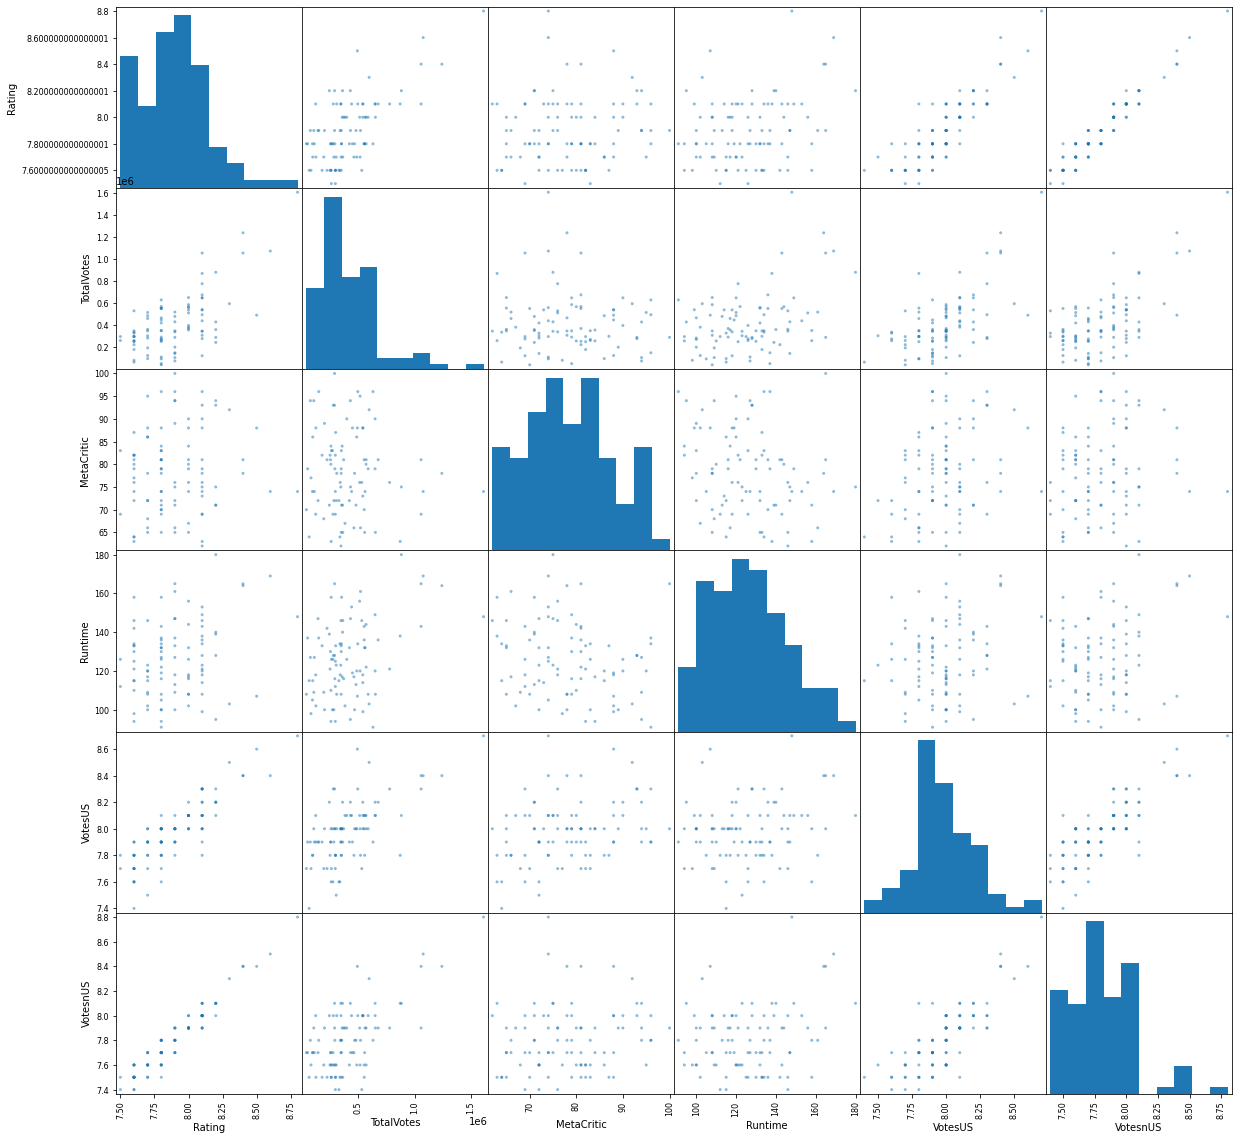

In [12]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show()

## Baseline Modeling 

In [13]:
y = df.Rating
X = df[['TotalVotes', 'MetaCritic', 'Budget', 'Runtime', 'VotesUS', 'VotesnUS']]
# We need to separate our feature matrix from our y variable for Sklearn. 

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
cor_X = MinMaxScaler().fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(cor_X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(73, 6) (73,)
(19, 6) (19,)


Now we are ready to use our model. We are going to **fit** our model on the training data. Then we are going to test our model by having it **predict** *y* values for our *X_test* data. We can then **evaluate** how well our model performed by seeing how far off the predicted *y* values were from the actual *y* values. 

In [18]:
from sklearn import linear_model

In [19]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

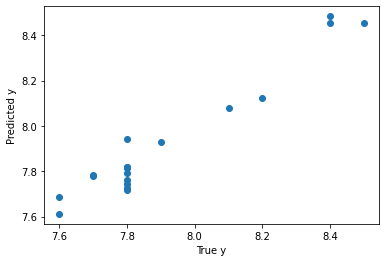

In [20]:
plt.scatter(y_test, predictions)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.show()

In [21]:
print ('Score:', model.score(X_test, y_test))  # R-squared is the default metric used by Sklearn. 

Score: 0.9419175440024756


In [22]:
lm.coef_

array([-0.07269305, -0.07757618,  0.05481013,  0.05048095,  0.29096757,
        1.09890022])

## 5) Secondary Modeling 

Instead of going into every single regression model you could use in this scenario, I am going to use a Kaggle favorite, **Random Forests**. The Random Forests model is an ensemble model that uses many decision trees to classify or regress. The training algorithm uses bagging, which is a combination of bootstrap and aggregating.

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf = RandomForestRegressor()
model = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [25]:
print ('Score:', model.score(X_test, y_test))  # R-square is still the default for Sklearn. 

Score: 0.8909660110149572


In [26]:
model.feature_importances_

array([0.08145152, 0.01136798, 0.02190499, 0.01703227, 0.05551691,
       0.81272634])